**Title**: Data Wrangling 11.2 Exercises  
**Author**: Ryan Weeks  
**Date**: 2/22/2025  
**Description**:  

# Exploratory Data Analysis of eda_data.csv

This notebook performs an Exploratory Data Analysis (EDA) on `eda_data.csv`. 
We will:
1. Load the dataset
2. Check for missing values & structure
3. Clean data (convert non-numeric columns, remove unwanted characters)
4. Handle missing values (fill with median)
5. Provide descriptive statistics & insights
6. Visualize distributions

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load the Data
We start by loading the dataset and inspecting its first few rows.

In [5]:
file_path = "C:/Users/Weekseey/Documents/Bellevue Work/Predictive Analytics/eda_data.csv"
df = pd.read_csv(file_path)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,-17.933519,6.559220,-14.452810,-4.732855,0.381673,2.563194,"($1,306.52)",-89.394348,-28.454044,-16.201298,-0.01%,0.217010,9.729891,-0.786431,0.666146
1,-37.214754,10.774930,-15.384004,-0.077339,10.983774,-15.210206,($24.86),153.032652,-32.557736,69.675903,0.00%,-3.584908,35.727926,-0.985552,0.378411
2,0.330441,-19.609972,-9.167911,2.064124,12.071688,12.506141,($110.85),-141.437276,-20.794952,55.042604,0.00%,-3.991366,-9.283523,-3.394718,0.624498
3,-13.709765,-8.011390,6.759264,1.727615,-1.768382,24.039733,($324.43),51.039653,-7.046908,-31.424419,0.01%,7.908897,-2.891882,-2.690222,0.126622
4,-4.202598,7.076210,-26.004919,-4.269696,-3.414224,2.115989,"$1,213.37",-31.046700,19.061182,-31.525515,-0.01%,0.846719,25.497480,3.516801,0.640025


## Step 2: Check Data Structure
We check for missing values and understand the structure of the dataset.

In [7]:
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9996 non-null   float64
 1   x1      9995 non-null   float64
 2   x2      9996 non-null   float64
 3   x3      9997 non-null   float64
 4   x4      9997 non-null   float64
 5   x5      9999 non-null   float64
 6   x6      9996 non-null   object 
 7   x7      9998 non-null   float64
 8   x8      9999 non-null   float64
 9   x9      9996 non-null   float64
 10  x10     9997 non-null   object 
 11  x11     9995 non-null   float64
 12  x12     9999 non-null   float64
 13  x13     9998 non-null   float64
 14  y       9999 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB
None

Missing Values:
 x0     3
x1     4
x2     3
x3     2
x4     2
x5     0
x6     3
x7     1
x8     0
x9     3
x10    2
x11    4
x12    0
x13    1
y      0
dtype: int64


## Step 3: Rename Columns
We rename columns to be more descriptive (e.g., `x0` → `feature_0`, `y` → `target`).

In [9]:
df.columns = [f"feature_{i}" if col != "y" else "target" for i, col in enumerate(df.columns)]
print("Updated column names:", df.columns)

Updated column names: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'target'],
      dtype='object')


## Step 4: Data Cleaning
We will:
- Identify non-numeric columns that should be numeric
- Remove unwanted characters (%, (), $, etc.)

In [11]:
def clean_numeric_column(col):
    if df[col].dtype == 'object':  # Only clean object-type columns
        df[col] = df[col].astype(str).str.replace(r"[(),$%]", "", regex=True)  # Remove unwanted characters
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float

# Apply cleaning to all columns
for col in df.columns:
    clean_numeric_column(col)

print(df.info())  # Check structure after cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   9996 non-null   float64
 1   feature_1   9995 non-null   float64
 2   feature_2   9996 non-null   float64
 3   feature_3   9997 non-null   float64
 4   feature_4   9997 non-null   float64
 5   feature_5   9999 non-null   float64
 6   feature_6   9996 non-null   float64
 7   feature_7   9998 non-null   float64
 8   feature_8   9999 non-null   float64
 9   feature_9   9996 non-null   float64
 10  feature_10  9997 non-null   float64
 11  feature_11  9995 non-null   float64
 12  feature_12  9999 non-null   float64
 13  feature_13  9998 non-null   float64
 14  target      9999 non-null   float64
dtypes: float64(15)
memory usage: 1.1 MB
None


## Step 5: Handle Missing Values
We fill missing values with the median of their respective columns to avoid skewing data.

In [13]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)
print("\nMissing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
target        0
dtype: int64


## Step 6: Descriptive Statistics
We generate summary statistics to identify trends and potential outliers.

In [15]:
print(df.describe())

         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean      6.501138    -3.729918    -7.335830    -0.001321     1.347115   
std      29.135661    17.233729    38.349260     3.994907     9.605734   
min    -106.809919   -65.137848  -150.846091   -14.616540   -37.499530   
25%     -13.091886   -15.351276   -33.072206    -2.681270    -5.047231   
50%       6.659263    -3.825630    -7.374468     0.010637     1.217076   
75%      26.196314     7.761736    18.464243     2.635557     7.802829   
max     114.823451    67.685933   127.204103    16.923269    38.624213   

         feature_5    feature_6    feature_7    feature_8    feature_9  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000   
mean      1.214413   797.350141    -4.239913    -0.297257   -22.481443   
std      17.352962   602.604374   131.915386    37.987287    91.709978   
min     -59.900503     0.030000  -661

## Step 7: Data Visualization
We visualize the distributions of key numeric variables.

<Figure size 1200x600 with 0 Axes>

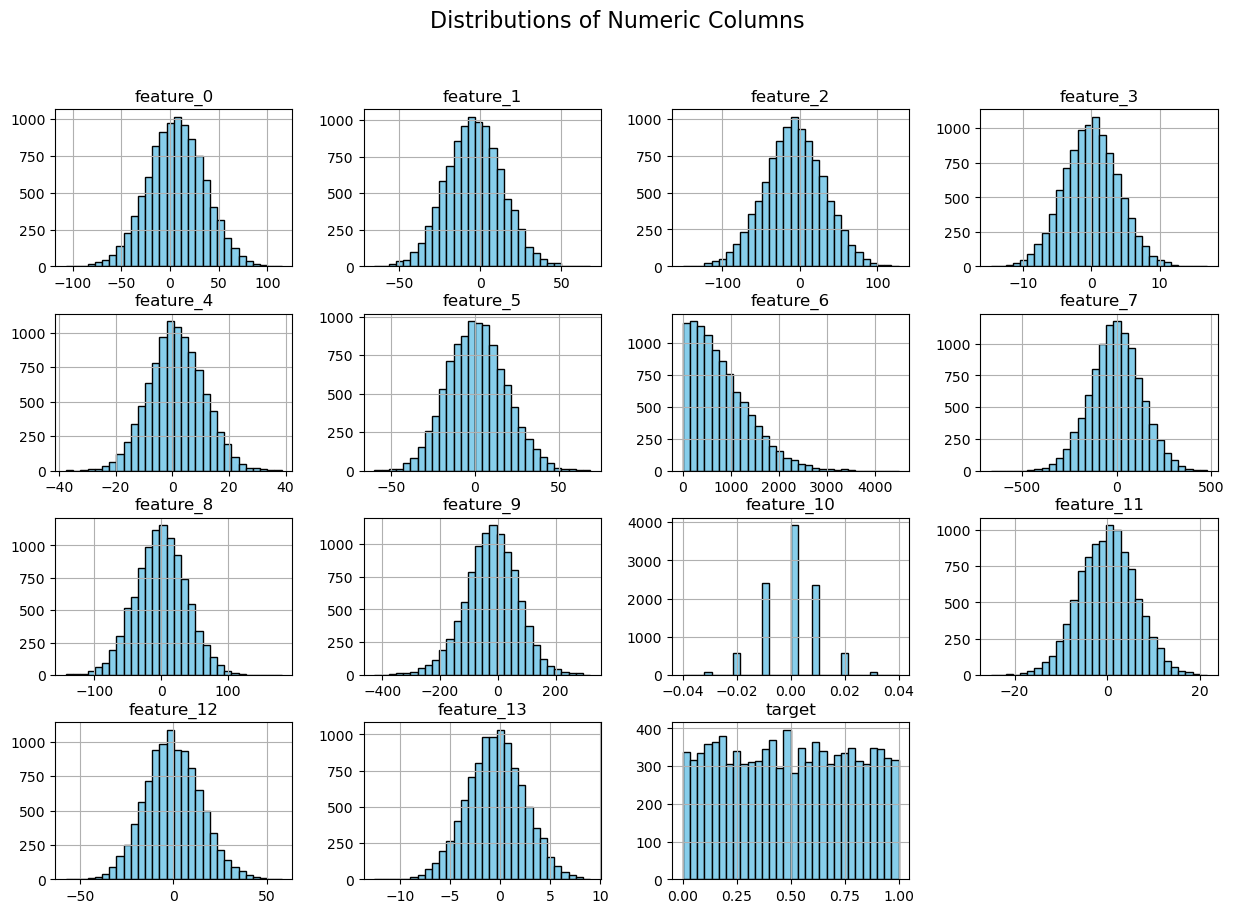

In [17]:
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Columns", fontsize=16)
plt.show()

### Distribution Insights:
- Most features follow a normal distribution.
- `feature_6` is **skewed right**.
- `target` follows a **uniform distribution**.

## Step 8: Pandas Profiling Report
We generate an automated profiling report for `eda_data_small.csv` using `ydata-profiling` (formerly Pandas Profiling).

In [30]:
from ydata_profiling import ProfileReport

# Load the small dataset
small_file_path = "C:/Users/Weekseey/Documents/Bellevue Work/Predictive Analytics/eda_data_small.csv"
df_small = pd.read_csv(small_file_path)

# Generate and save the profiling report
profile = ProfileReport(df_small, explorative=True)
profile.to_file("eda_data_small_profile.html")

print("Profiling report saved as eda_data_small_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved as eda_data_small_profile.html
